In [1]:
import palantir
import scanpy as sc
import scvelo as scv
import pandas as pd
import numpy as np
import os
import sys
import cellrank as cr
# Plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

# warnings
import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.filterwarnings(action="ignore", category=NumbaDeprecationWarning)
warnings.filterwarnings(
    action="ignore", module="scanpy", message="No data for colormapping"
)

# Inline plotting
%matplotlib inline

/home/xcl/anaconda3/envs/cellrank/lib/python3.9/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
sc.settings.verbosity = 4
sc.set_figure_params(dpi=80, dpi_save=300, facecolor='white') 
sc.logging.print_header()

scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.1.3 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.11


In [3]:
df = pd.read_csv('/home/xcl/KPM/AT2_LUAD_Inter_SCLC-7-9-.csv', index_col=0)

In [4]:
df

KPM257_AAACCCAAGCAGGTCA-1  KPM257_AAACCCAAGCCAAGCA-1  \
Xkr4                             0                          0   
Gm19938                          0                          0   
Gm37381                          0                          0   
Rp1                              0                          0   
Sox17                            0                          0   
...                            ...                        ...   
Asb9                             0                          0   
Gm8817                           0                          0   
Csprs                            0                          0   
Spry3                            0                          0   
Gm10931                          0                          0   

         KPM257_AAACCCAAGCCATGCC-1  KPM257_AAACCCAAGGCAATGC-1  \
Xkr4                             0                          0   
Gm19938                          0                          0   
Gm37381                          0                          0   
Rp1                              0                          0   
Sox17                            0                          0   
...                            ...                        ...   
Asb9                             0                          0   
Gm8817                           0                          0   
Csprs                            0                          0   
Spry3                            0                          0   
Gm10931                          0                          0   

         KPM257_AAACCCAGTATCTCTT-1  KPM257_AAACCCAGTGACATCT-1  \
Xkr4                             0                          0   
Gm19938                          0                          0   
Gm37381                          0                          0   
Rp1                              0                          0   
Sox17                            0                          0   
...                            ...                        ...   
Asb9                             0                          0   
Gm8817                           0                          0   
Csprs                            0                          0   
Spry3                            0                          0   
Gm10931                          0                          0   

         KPM257_AAACCCAGTGAGTTGG-1  KPM257_AAACCCAGTTTGGCTA-1  \
Xkr4                             0                          0   
Gm19938                          0                          0   
Gm37381                          0                          0   
Rp1                              0                          0   
Sox17                            0                          0   
...                            ...                        ...   
Asb9                             0                          0   
Gm8817                           0                          0   
Csprs                            0                          0   
Spry3                            0                          0   
Gm10931                          0                          0   

         KPM257_AAACCCATCTACTTCA-1  KPM257_AAACGAAAGCTCACTA-1  ...  \
Xkr4                             0                          0  ...   
Gm19938                          0                          0  ...   
Gm37381                          0                          0  ...   
Rp1                              0                          0  ...   
Sox17                            0                          0  ...   
...                            ...                        ...  ...   
Asb9                             0                          0  ...   
Gm8817                           0                          0  ...   
Csprs                            0                          0  ...   
Spry3                            0                          0  ...   
Gm10931                          0                          0  ...   

         KPM261_TTTGGTTAGCACCGTC-1  KPM261_T

In [5]:
df = np.transpose(df)

In [6]:
cellinfo = pd.DataFrame(df.index,index=df.index,columns=['sample_index'])
geneinfo = pd.DataFrame(df.columns,index=df.columns,columns=['genes_index'])
ad = sc.AnnData(df, obs=cellinfo, var = geneinfo)

In [7]:
sc.pp.normalize_total(ad)

normalizing counts per cell
    finished (0:00:01)


In [8]:
palantir.preprocess.log_transform(ad)

In [9]:
ad

AnnData object with n_obs × n_vars = 10203 × 20890
    obs: 'sample_index'
    var: 'genes_index'

In [10]:
sc.pp.highly_variable_genes(ad, n_top_genes=1500, flavor="cell_ranger")

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    the 1500 top genes correspond to a normalized dispersion cutoff of 1.719096744137123
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [11]:
highly_variable_genes = ad.var.index[ad.var['highly_variable']]

In [12]:
highly_variable_genes

Index(['Alkal1', 'Cspp1', 'Xkr9', 'Pkhd1', 'Tram2', 'Gm27028', 'Ptp4a1',
       'Ptp4a1.1', 'Gm26788', 'Amer3',
       ...
       'Abcc6', 'Gm3776', 'Ccr3', 'C730027H18Rik.1', 'Gm12589', 'Gm48236',
       'Nkx2-9', '1700010B13Rik', 'Tpsab1', 'Gm5941'],
      dtype='object', length=1500)

In [13]:
# Note in the manuscript, we did not use highly variable genes but scanpy by default uses only highly variable genes
sc.pp.pca(ad)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)


In [14]:
sc.pp.neighbors(ad)
sc.tl.umap(ad)

computing neighbors
    computing neighbors
    using 'X_pca' with n_pcs = 50
    computed neighbors (0:00:09)
    computed connectivities (0:00:01)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP


  0%|          | 0/200 [00:00<?, ?it/s]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


In [15]:
sc.tl.draw_graph(ad)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:08)


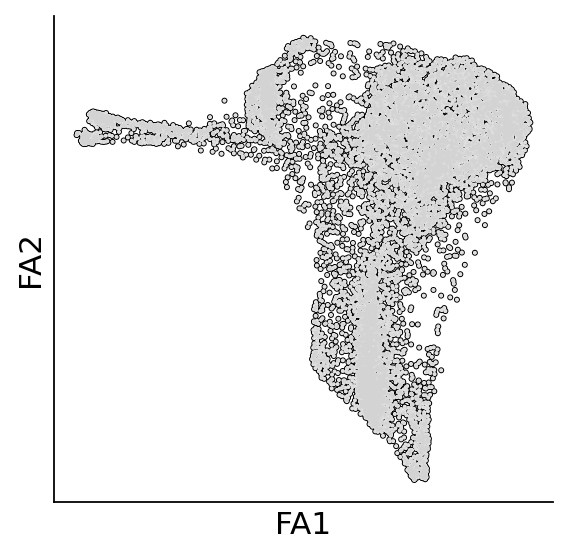

In [16]:
sc.pl.draw_graph(ad, s=10, add_outline=True,save="fa2.png")

running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


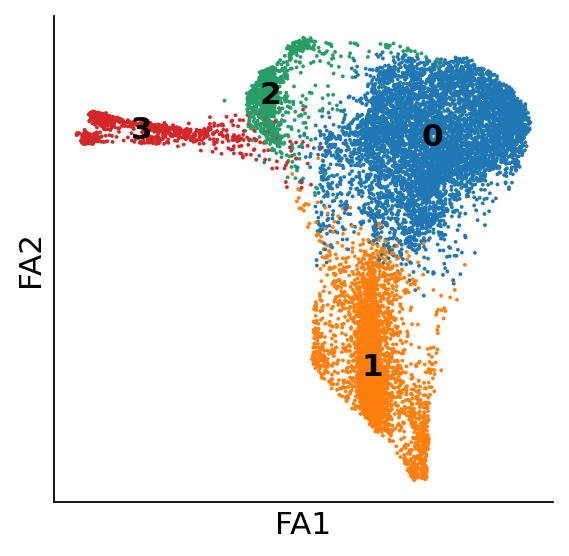

In [17]:
# Leiden
sc.tl.leiden(ad, resolution=0.2)
sc.pl.draw_graph(ad, color='leiden', legend_loc='on data',title = "")

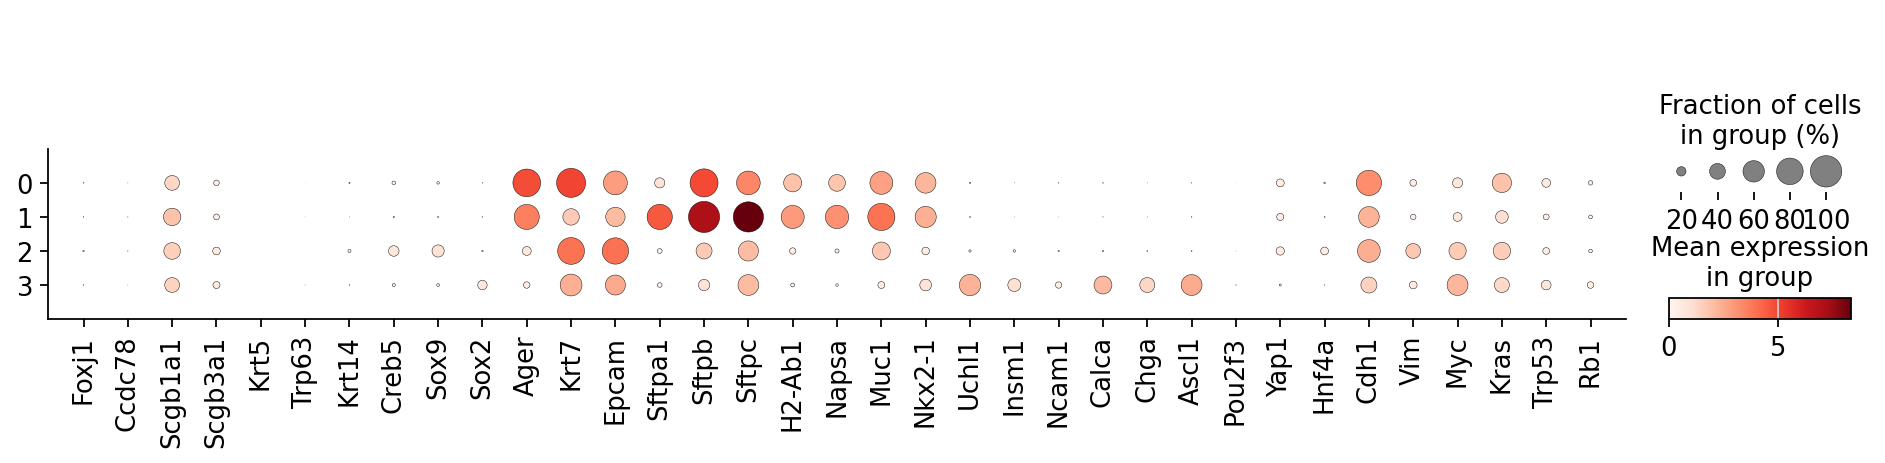

In [18]:
# marker genes的表达分析
marker_genes = ["Foxj1", "Ccdc78", "Scgb1a1", "Scgb3a1", "Krt5", "Trp63", "Krt14", "Creb5", "Sox9", "Sox2", 
"Ager", "Krt7", "Epcam", "Sftpa1", "Sftpb", "Sftpc", "H2-Ab1", "Napsa", "Muc1", "Nkx2-1",
"Uchl1", "Insm1", "Ncam1", "Calca", "Chga", "Ascl1", "Pou2f3", "Yap1","Hnf4a", "Cdh1", "Vim", "Myc", "Kras", "Trp53", "Rb1"]
sc.pl.dotplot(ad, marker_genes, groupby='leiden')

In [19]:
new_cluster_names = [
    'LUAD', 'AT2',
    'Intermediate', 'SCLC']
ad.obs['leiden'] = ad.obs['leiden'].cat.rename_categories(new_cluster_names)

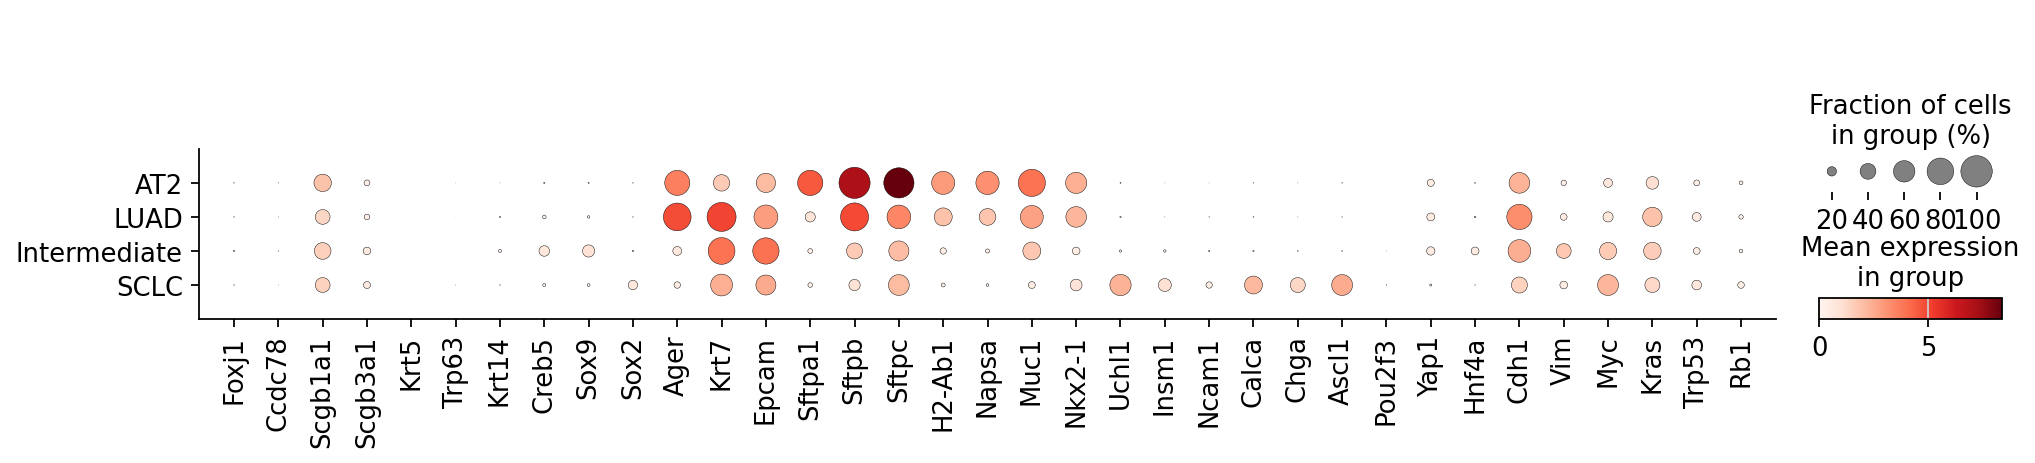

In [20]:
custom_legend_order=["AT2","LUAD","Intermediate","SCLC"]
sc.pl.dotplot(ad, marker_genes, categories_order =custom_legend_order, groupby='leiden', save="dotplot2.png")

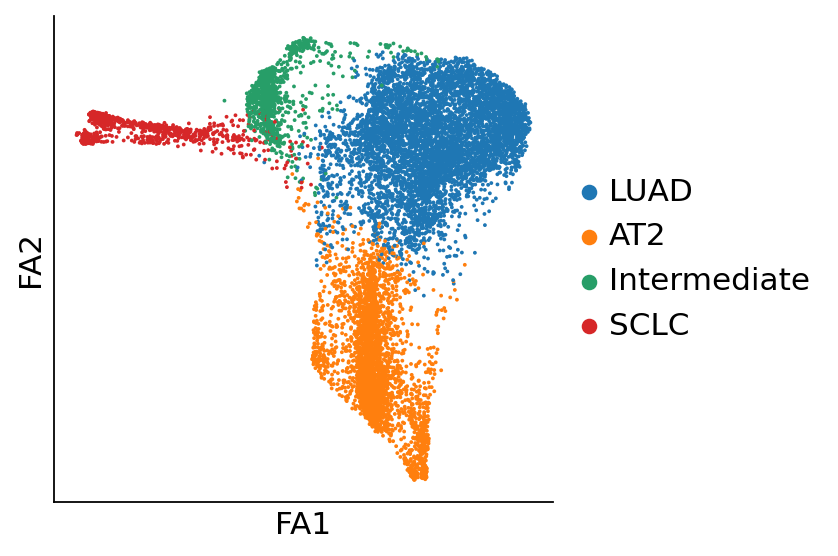

In [21]:
custom_legend_order=["AT2","LUAD","Intermediate","SCLC"]
sc.pl.draw_graph(ad, color = "leiden", legend_loc="right margin", legend_fontweight="normal",legend_fontsize="medium",title = "",save = "FA_7_28_dot.pdf")

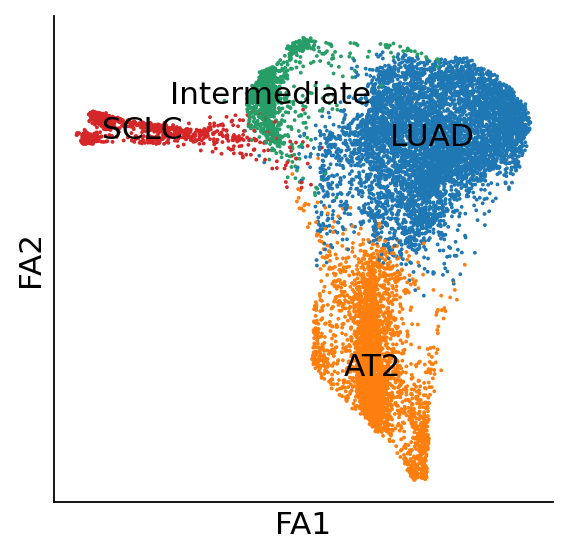

In [22]:
custom_legend_order=["AT2","LUAD","Intermediate","SCLC"]
sc.pl.draw_graph(ad, color = "leiden", legend_loc="on data", legend_fontweight="normal",legend_fontsize="medium",title = "",save = "FA_7_28_ondata.pdf")

In [23]:
# Run diffusion maps
dm_res = palantir.utils.run_diffusion_maps(ad, n_components=5)

computing neighbors
    computing neighbors
    computed neighbors (0:00:00)
    computed connectivities (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [24]:
ms_data = palantir.utils.determine_multiscale_space(ad)

In [25]:
imputed_X = palantir.utils.run_magic_imputation(ad)

/home/xcl/anaconda3/envs/cellrank/lib/python3.9/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/xcl/anaconda3/envs/cellrank/lib/python3.9/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/xcl/anaconda3/envs/cellrank/lib/python3.9/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe

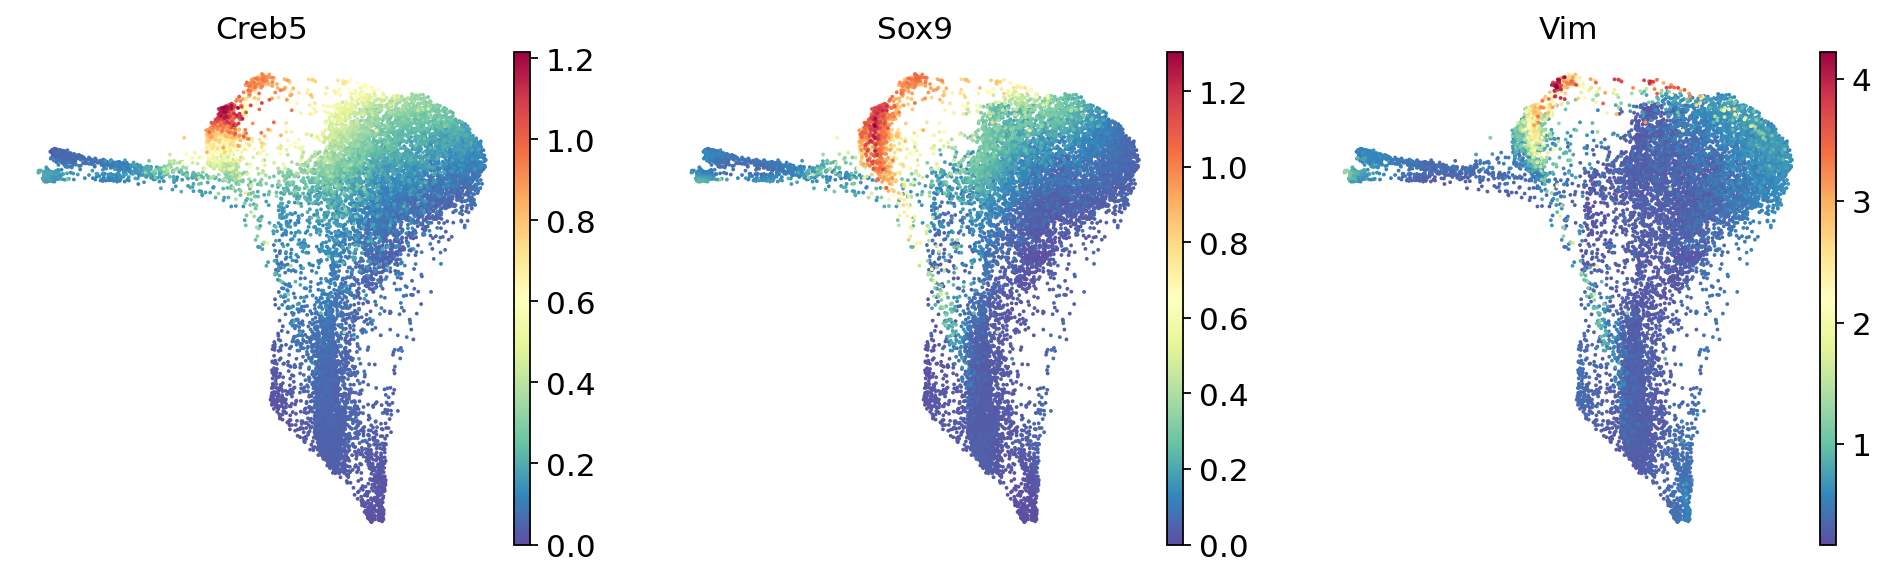

In [26]:
sc.pl.embedding(
    ad,
    basis="draw_graph_fa",
    layer="MAGIC_imputed_data",
    color=["Creb5", "Sox9", "Vim"],
    frameon=False,
    save="Creb5-Sox9-Vim-2.png"
)
plt.show()

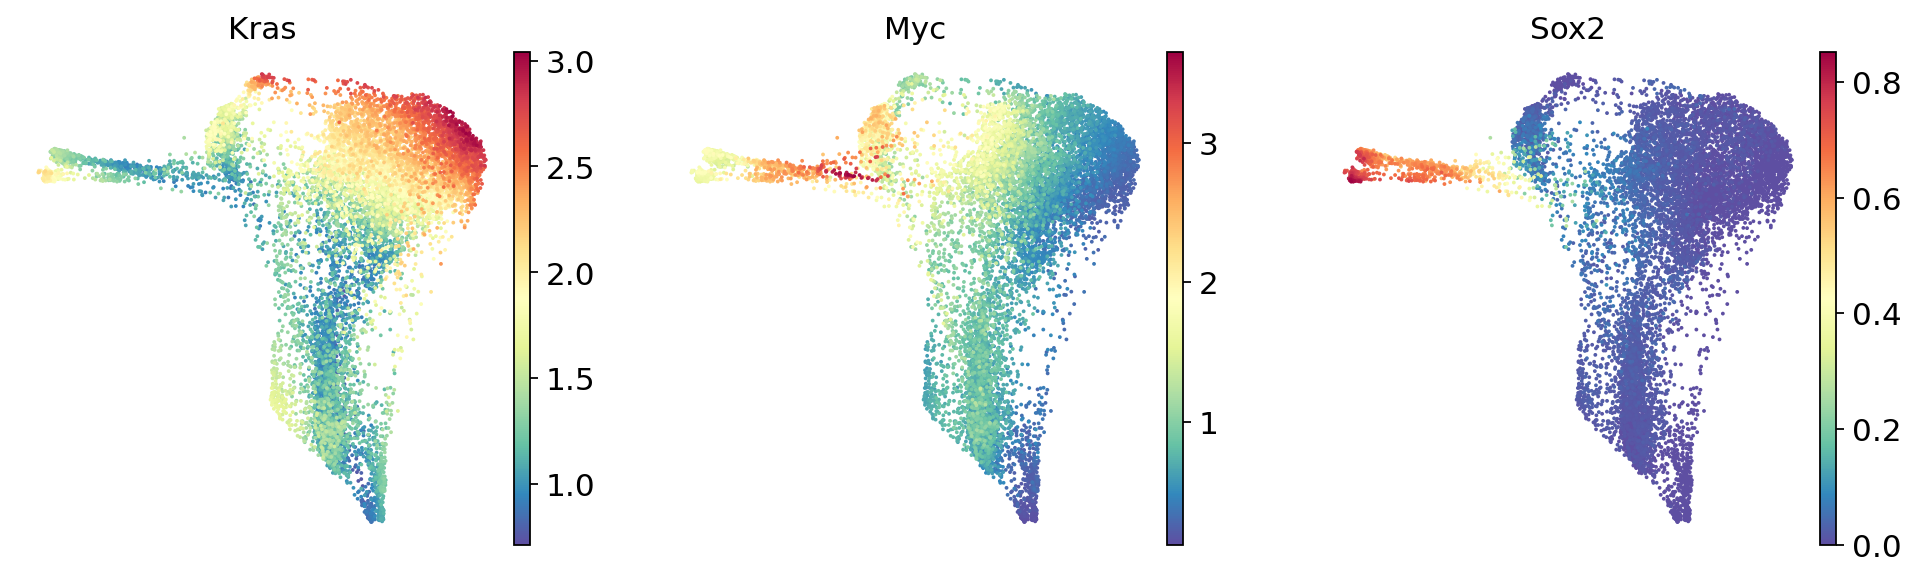

In [27]:
sc.pl.embedding(
    ad,
    basis="draw_graph_fa",
    layer="MAGIC_imputed_data",
    color=["Kras", "Myc", "Sox2"],
    frameon=False,
    save="Kras-Myc-Sox2-2.png"
)
plt.show()

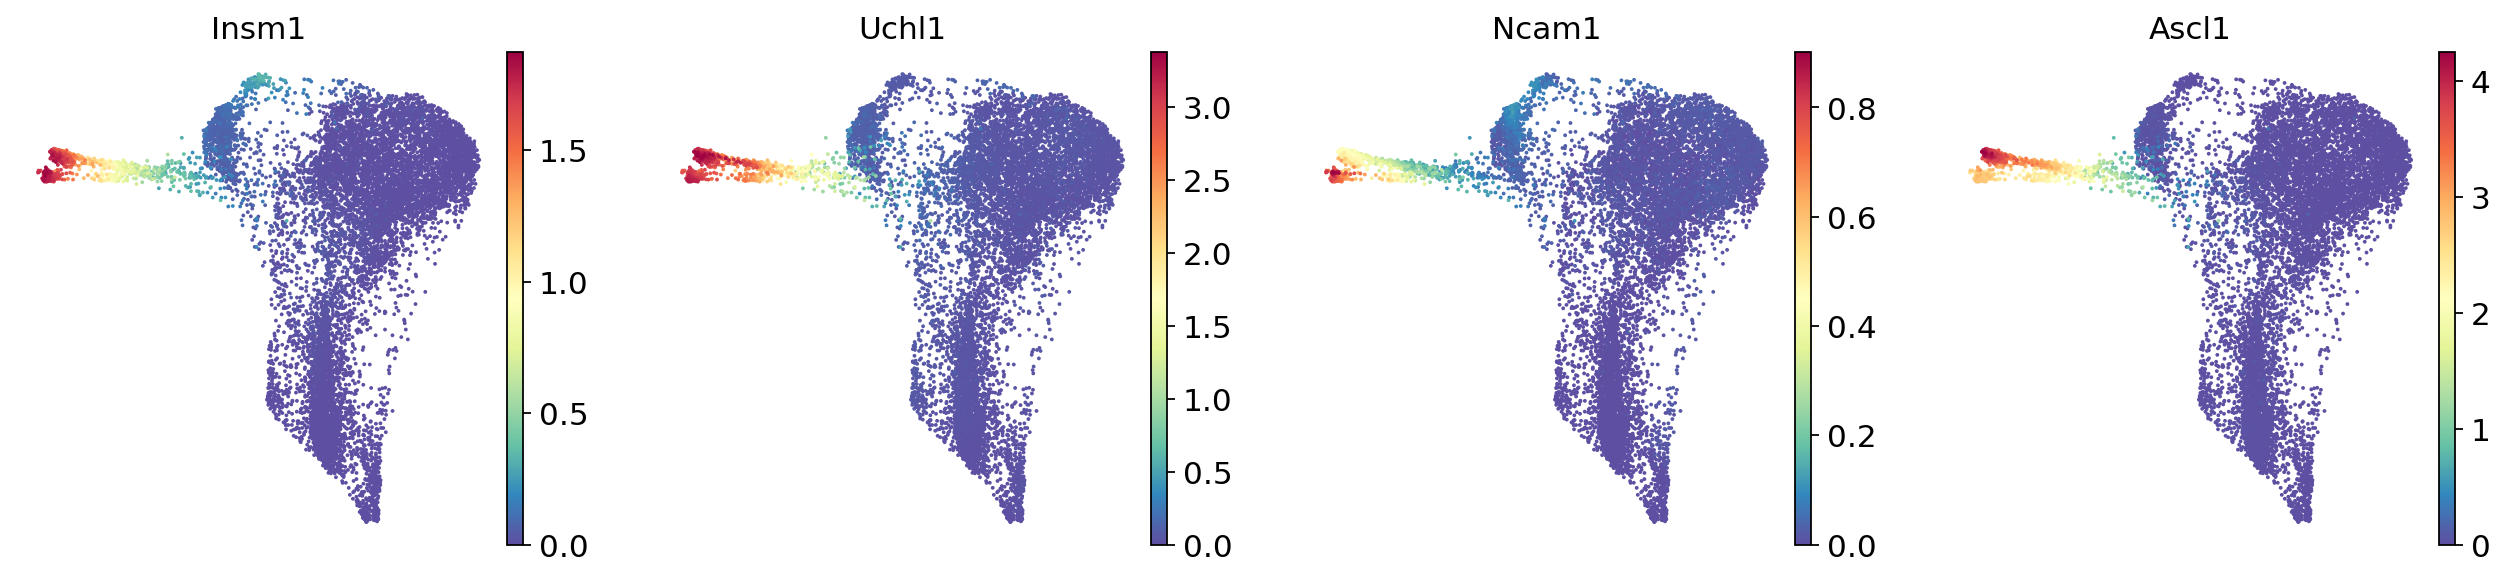

In [28]:
sc.pl.embedding(
    ad,
    basis="draw_graph_fa",
    layer="MAGIC_imputed_data",
    color=["Insm1", "Uchl1", "Ncam1", "Ascl1"],
    frameon=False,
    save="Insm1-Uchl1-Ncam1-Ascl1-2.png"
)
plt.show()

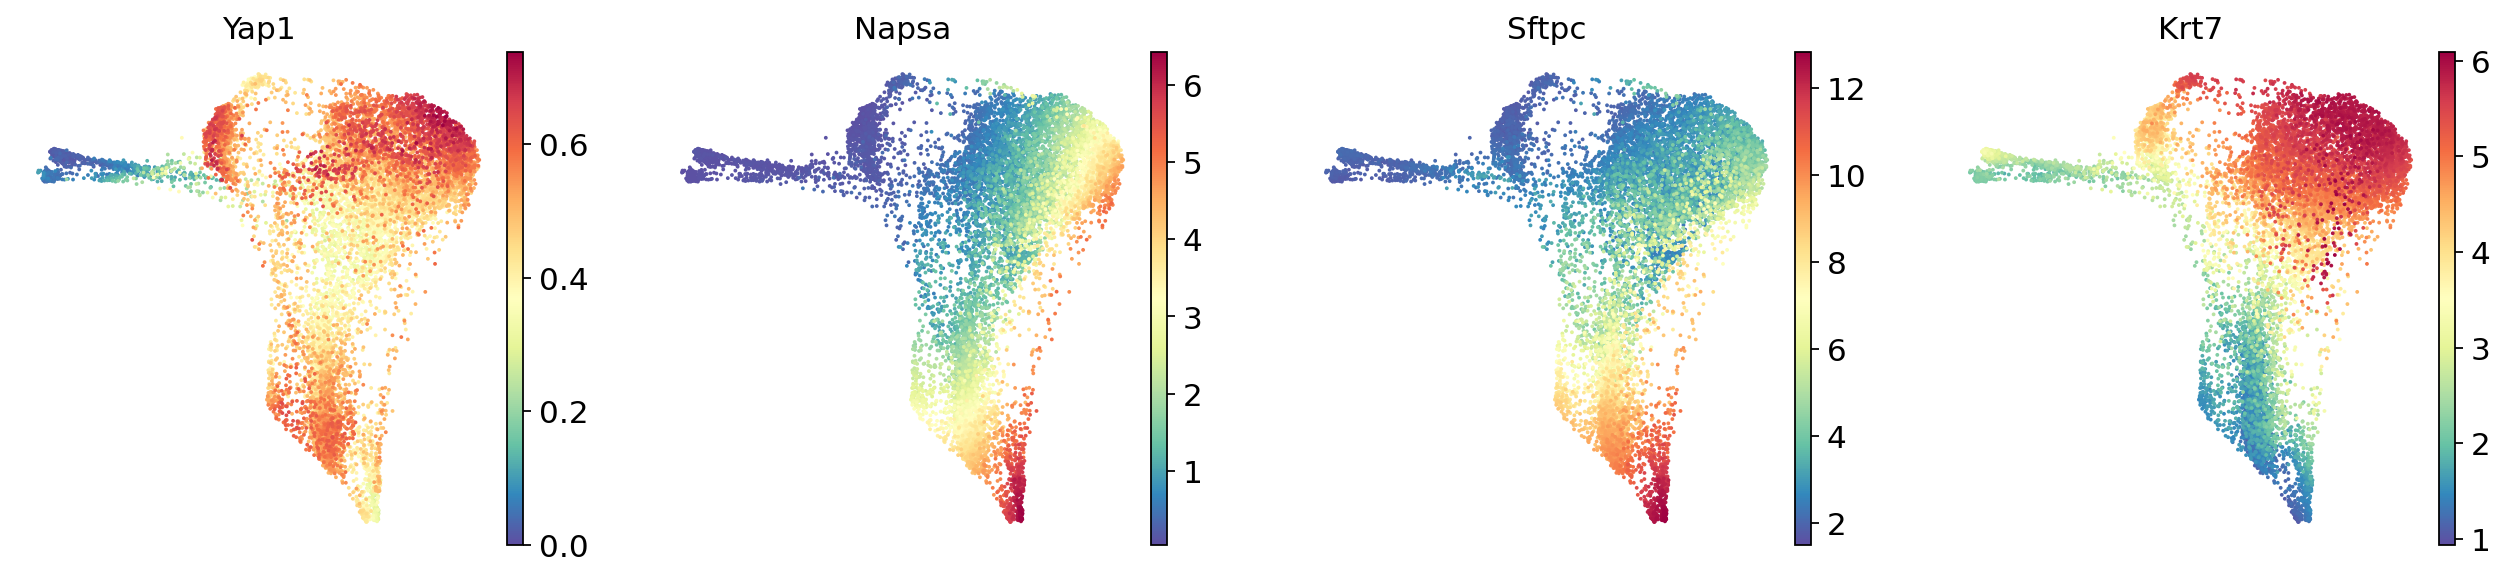

In [29]:
sc.pl.embedding(
    ad,
    basis="draw_graph_fa",
    layer="MAGIC_imputed_data",
    color=["Yap1", "Napsa", "Sftpc", "Krt7"],
    frameon=False,
    save="Yap1-Napsa-Sftpc-Krt7-2.png"
)
plt.show()

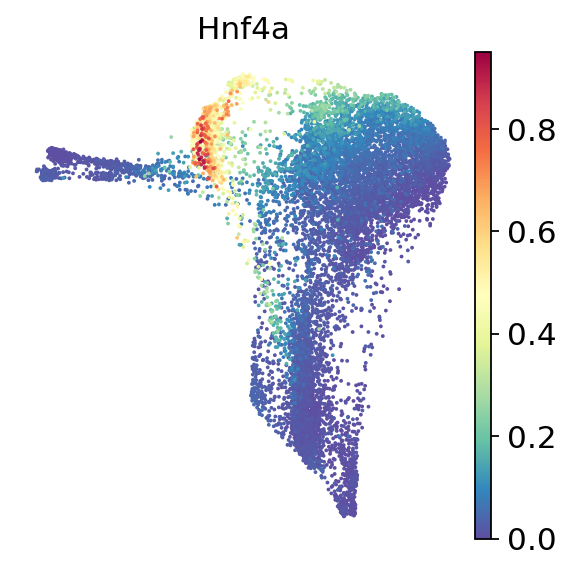

In [30]:
sc.pl.embedding(
    ad,
    basis="draw_graph_fa",
    layer="MAGIC_imputed_data",
    color=["Hnf4a"],
    frameon=False,
    save="Hnf4a-2.png"
)
plt.show()

In [31]:
start_cell = pd.Series(
    ["AT2"],
    index=["KPM261_ACATCGAAGACAGCTG-1"],
)

(<Figure size 320x320 with 1 Axes>, <Axes: >)

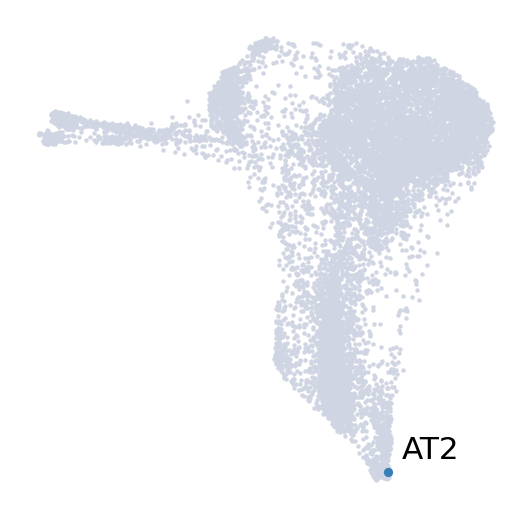

In [32]:
palantir.plot.highlight_cells_on_umap(
    # convert the draw-graph array in adata.obsm to a pandas dataframe with cells as indices and 'x','y' as columns:
    pd.DataFrame(ad.obsm['X_draw_graph_fa'], index=ad.obs.index, columns=['x','y']), 
   start_cell
)

In [33]:
start_cell = "KPM261_ACATCGAAGACAGCTG-1"
pr_res = palantir.core.run_palantir(
    ad, start_cell
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.04629537264506022 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


/home/xcl/anaconda3/envs/cellrank/lib/python3.9/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/xcl/anaconda3/envs/cellrank/lib/python3.9/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/xcl/anaconda3/envs/cellrank/lib/python3.9/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe

Time for shortest paths: 0.7796812057495117 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


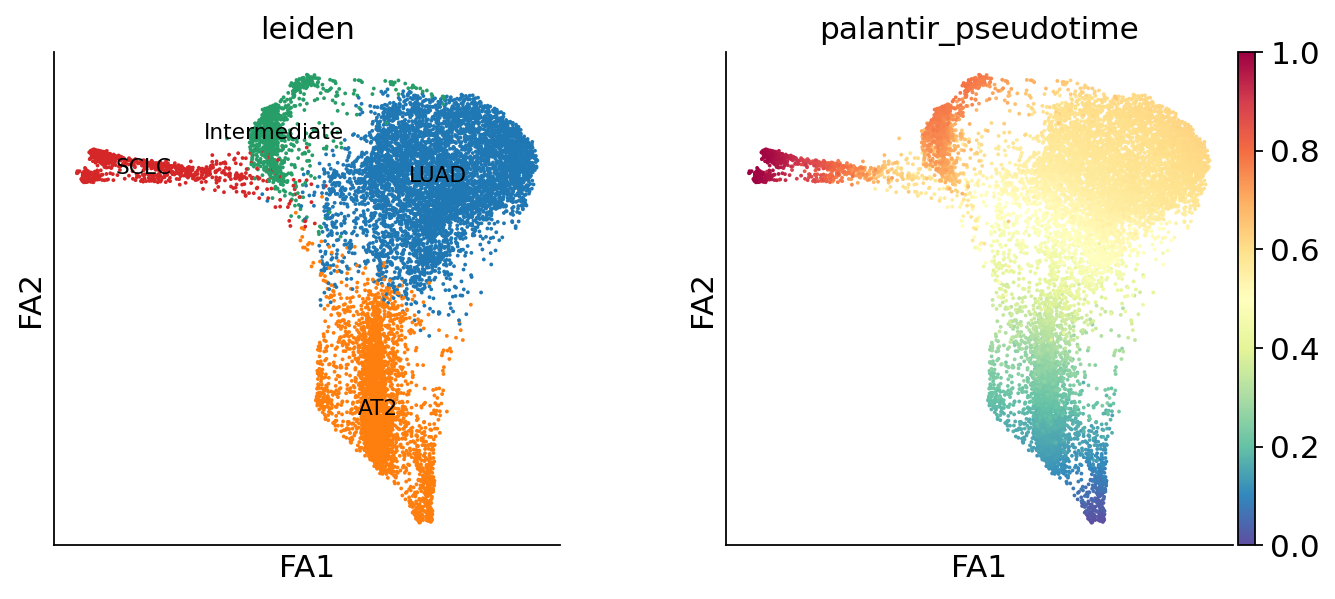

In [34]:
sc.pl.embedding(ad, basis="draw_graph_fa", color=["leiden", "palantir_pseudotime"],legend_loc='on data',legend_fontweight="medium",legend_fontsize="x-small",save="palantir.png")

In [35]:
from cellrank.kernels import PseudotimeKernel

pk = PseudotimeKernel(ad, time_key="palantir_pseudotime")

In [36]:
pk

PseudotimeKernel[n=10203]

In [37]:
pk.compute_transition_matrix()

  0%|          | 0/10203 [00:00<?, ?cell/s]

PseudotimeKernel[n=10203, dnorm=False, scheme='hard', frac_to_keep=0.3]

In [38]:
pk

PseudotimeKernel[n=10203, dnorm=False, scheme='hard', frac_to_keep=0.3]

In [39]:
ad

AnnData object with n_obs × n_vars = 10203 × 20890
    obs: 'sample_index', 'leiden', 'palantir_pseudotime', 'palantir_entropy'
    var: 'genes_index', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'draw_graph', 'leiden', 'leiden_colors', 'DM_EigenValues', 'palantir_waypoints'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'DM_EigenVectors', 'DM_EigenVectors_multiscaled', 'palantir_fate_probabilities'
    varm: 'PCs'
    layers: 'MAGIC_imputed_data'
    obsp: 'distances', 'connectivities', 'DM_Kernel', 'DM_Similarity'

In [40]:
from cellrank.kernels import ConnectivityKernel

ck = ConnectivityKernel(ad).compute_transition_matrix()

In [41]:
ck

ConnectivityKernel[n=10203, dnorm=True, key='connectivities']

In [42]:
combined_kernel = 0.8 * pk + 0.2 * ck
combined_kernel

(0.8 * PseudotimeKernel[n=10203, dnorm=False, scheme='hard', frac_to_keep=0.3] + 0.2 * ConnectivityKernel[n=10203, dnorm=True, key='connectivities'])

In [43]:
pk.write_to_adata()
ad.write("/home/xcl/KPM/KPM261_257_cellrank.h5ad")

In [44]:
adata = sc.read("/home/xcl/KPM/KPM261_257_cellrank.h5ad")
pk_new = cr.kernels.PseudotimeKernel.from_adata(adata, key="T_fwd")
pk_new

PseudotimeKernel[n=10203, dnorm=False, frac_to_keep=0.3, scheme='hard']

In [45]:
from cellrank.estimators import GPCCA

g = GPCCA(pk_new)
print(g)

GPCCA[kernel=PseudotimeKernel[n=10203], initial_states=None, terminal_states=None]


/home/xcl/anaconda3/envs/cellrank/lib/python3.9/site-packages/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


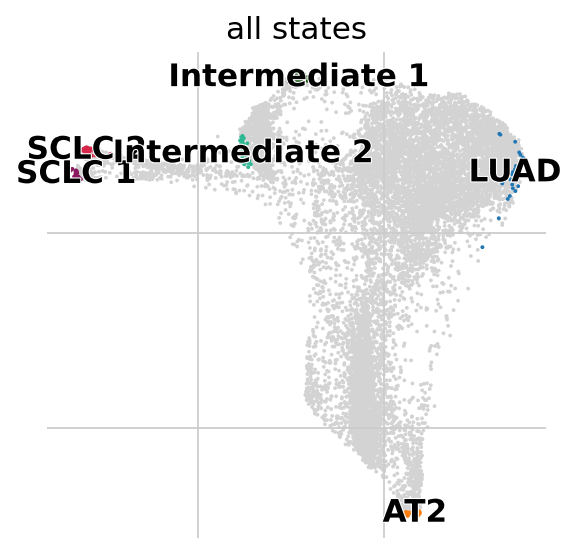

In [46]:
g.fit(n_states=6, cluster_key="leiden")
g.plot_macrostates(which="all",basis="draw_graph_fa")

/home/xcl/anaconda3/envs/cellrank/lib/python3.9/site-packages/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


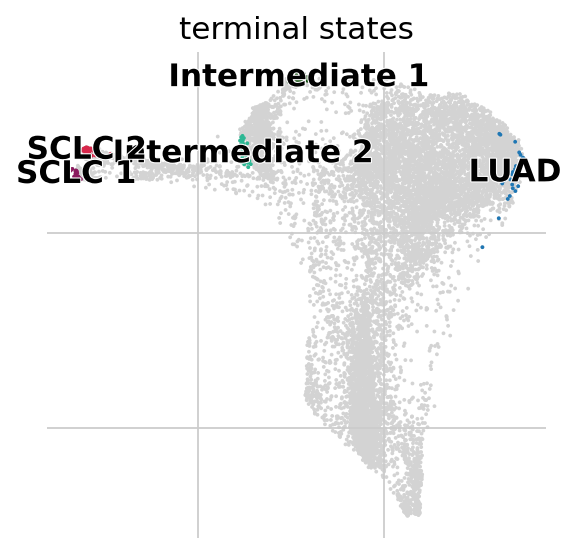

In [47]:
g.predict_terminal_states(method="top_n", n_states=5)
g.plot_macrostates(which="terminal",basis="draw_graph_fa")

  0%|          | 0/5 [00:00<?, ?/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0
/home/xcl/anaconda3/envs/cellrank/lib/python3.9/site-packages/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/home/xcl/anaconda3/envs/cellrank/lib/python3.9/site-packages/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter

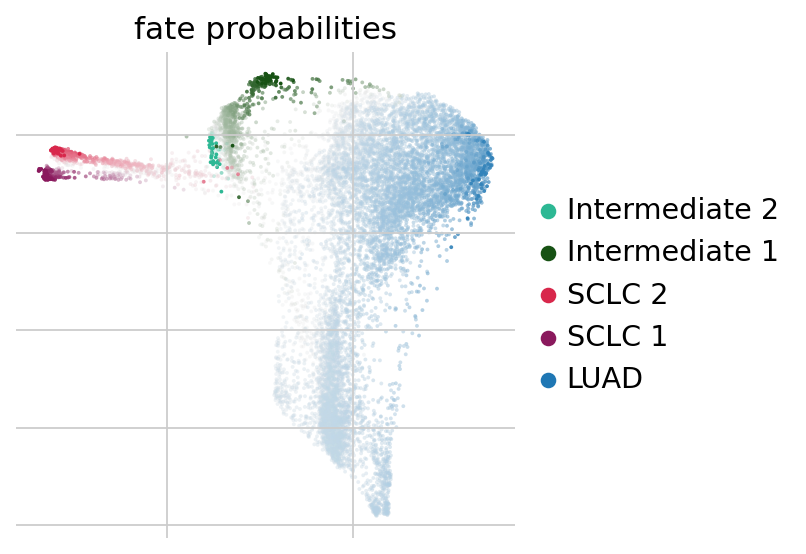

In [48]:
g.compute_fate_probabilities()
g.plot_fate_probabilities(legend_loc="right",basis="draw_graph_fa")

In [49]:
model = cr.models.GAM(adata)

  0%|          | 0/4 [00:00<?, ?gene/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0


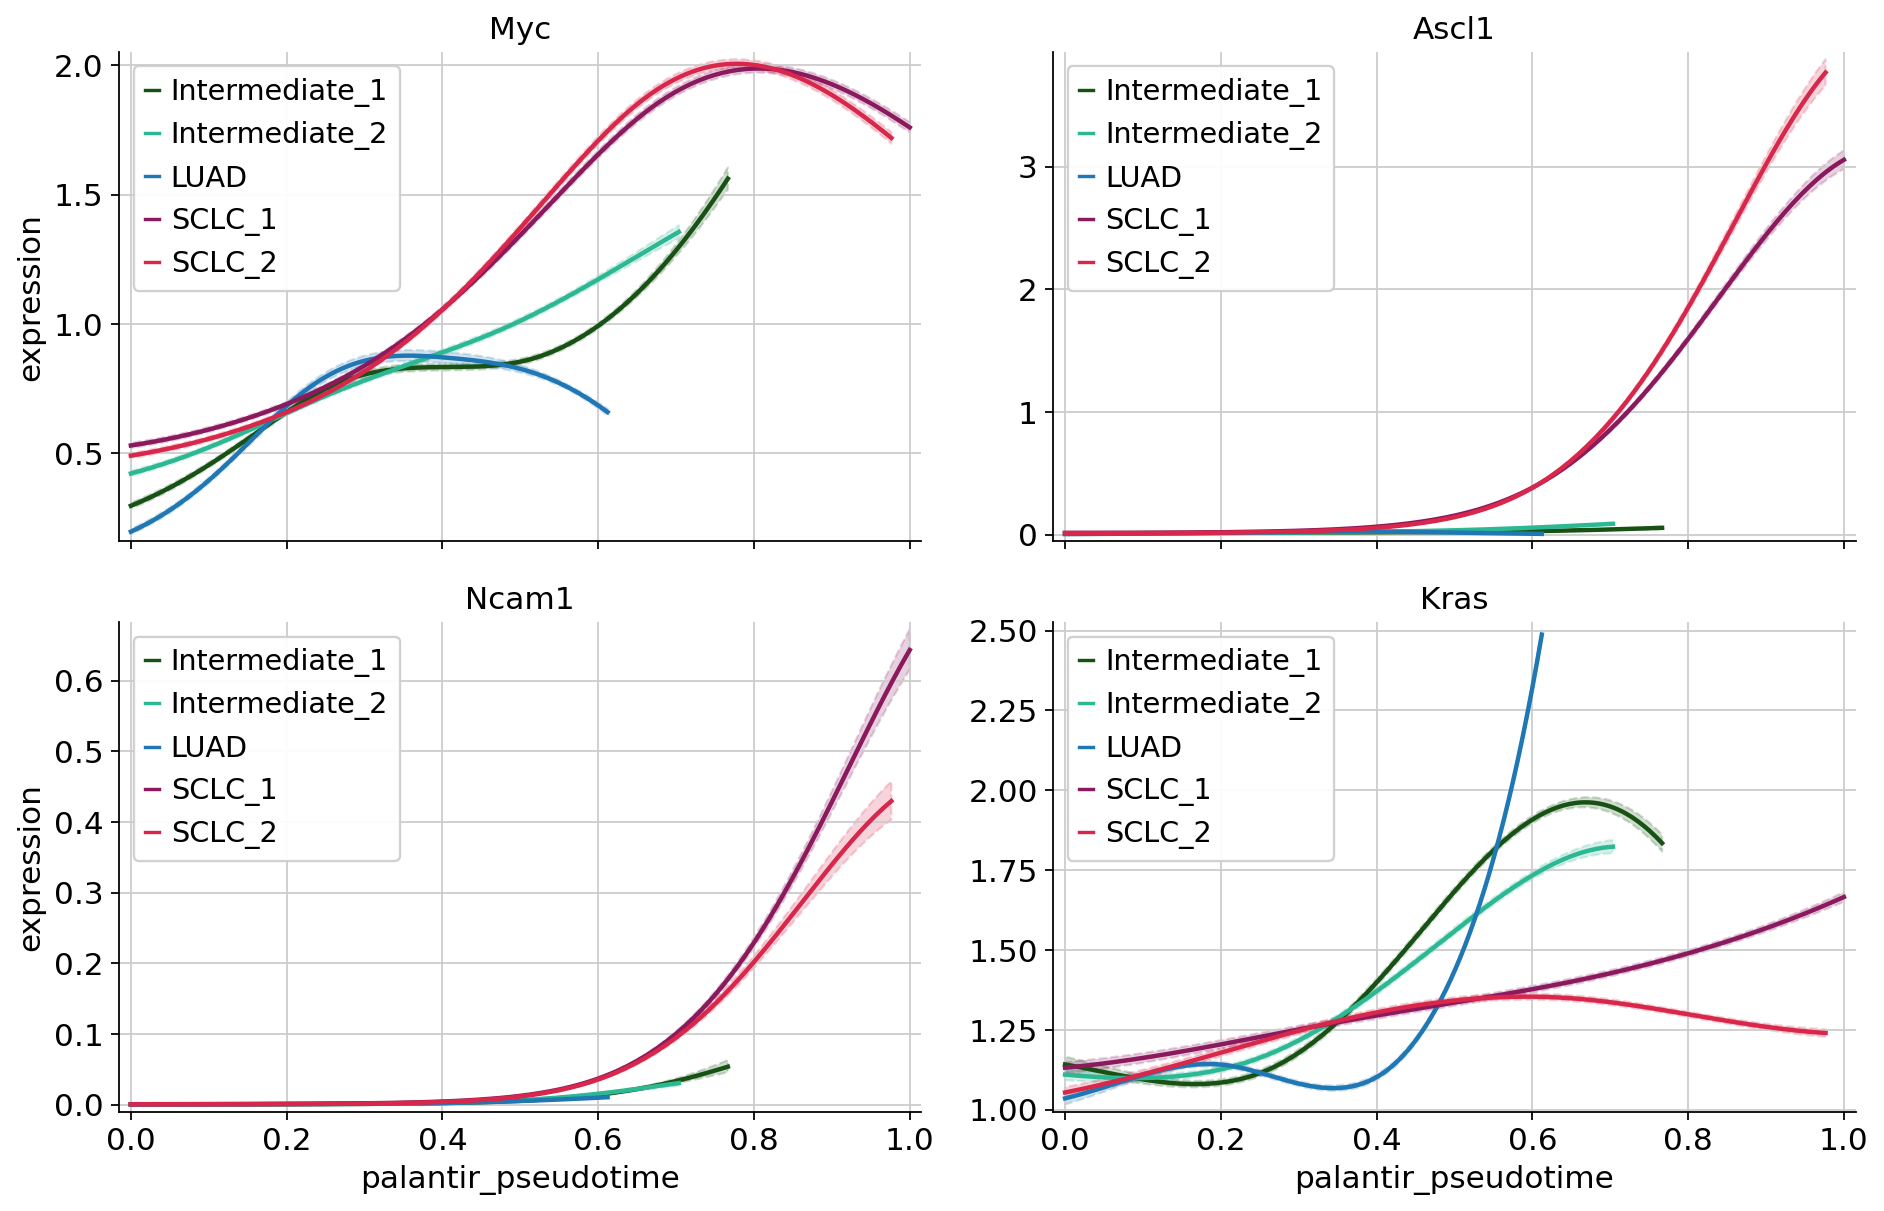

In [50]:
cr.pl.gene_trends(
    adata,
    model=model,
    data_key="MAGIC_imputed_data",
    genes=["Myc", "Ascl1","Ncam1","Kras"],
    same_plot=True,
    ncols=2,
    time_key="palantir_pseudotime",
    hide_cells=True,
)

In [51]:
plt.rcParams["axes.grid"] = False

  0%|          | 0/34 [00:00<?, ?gene/s]

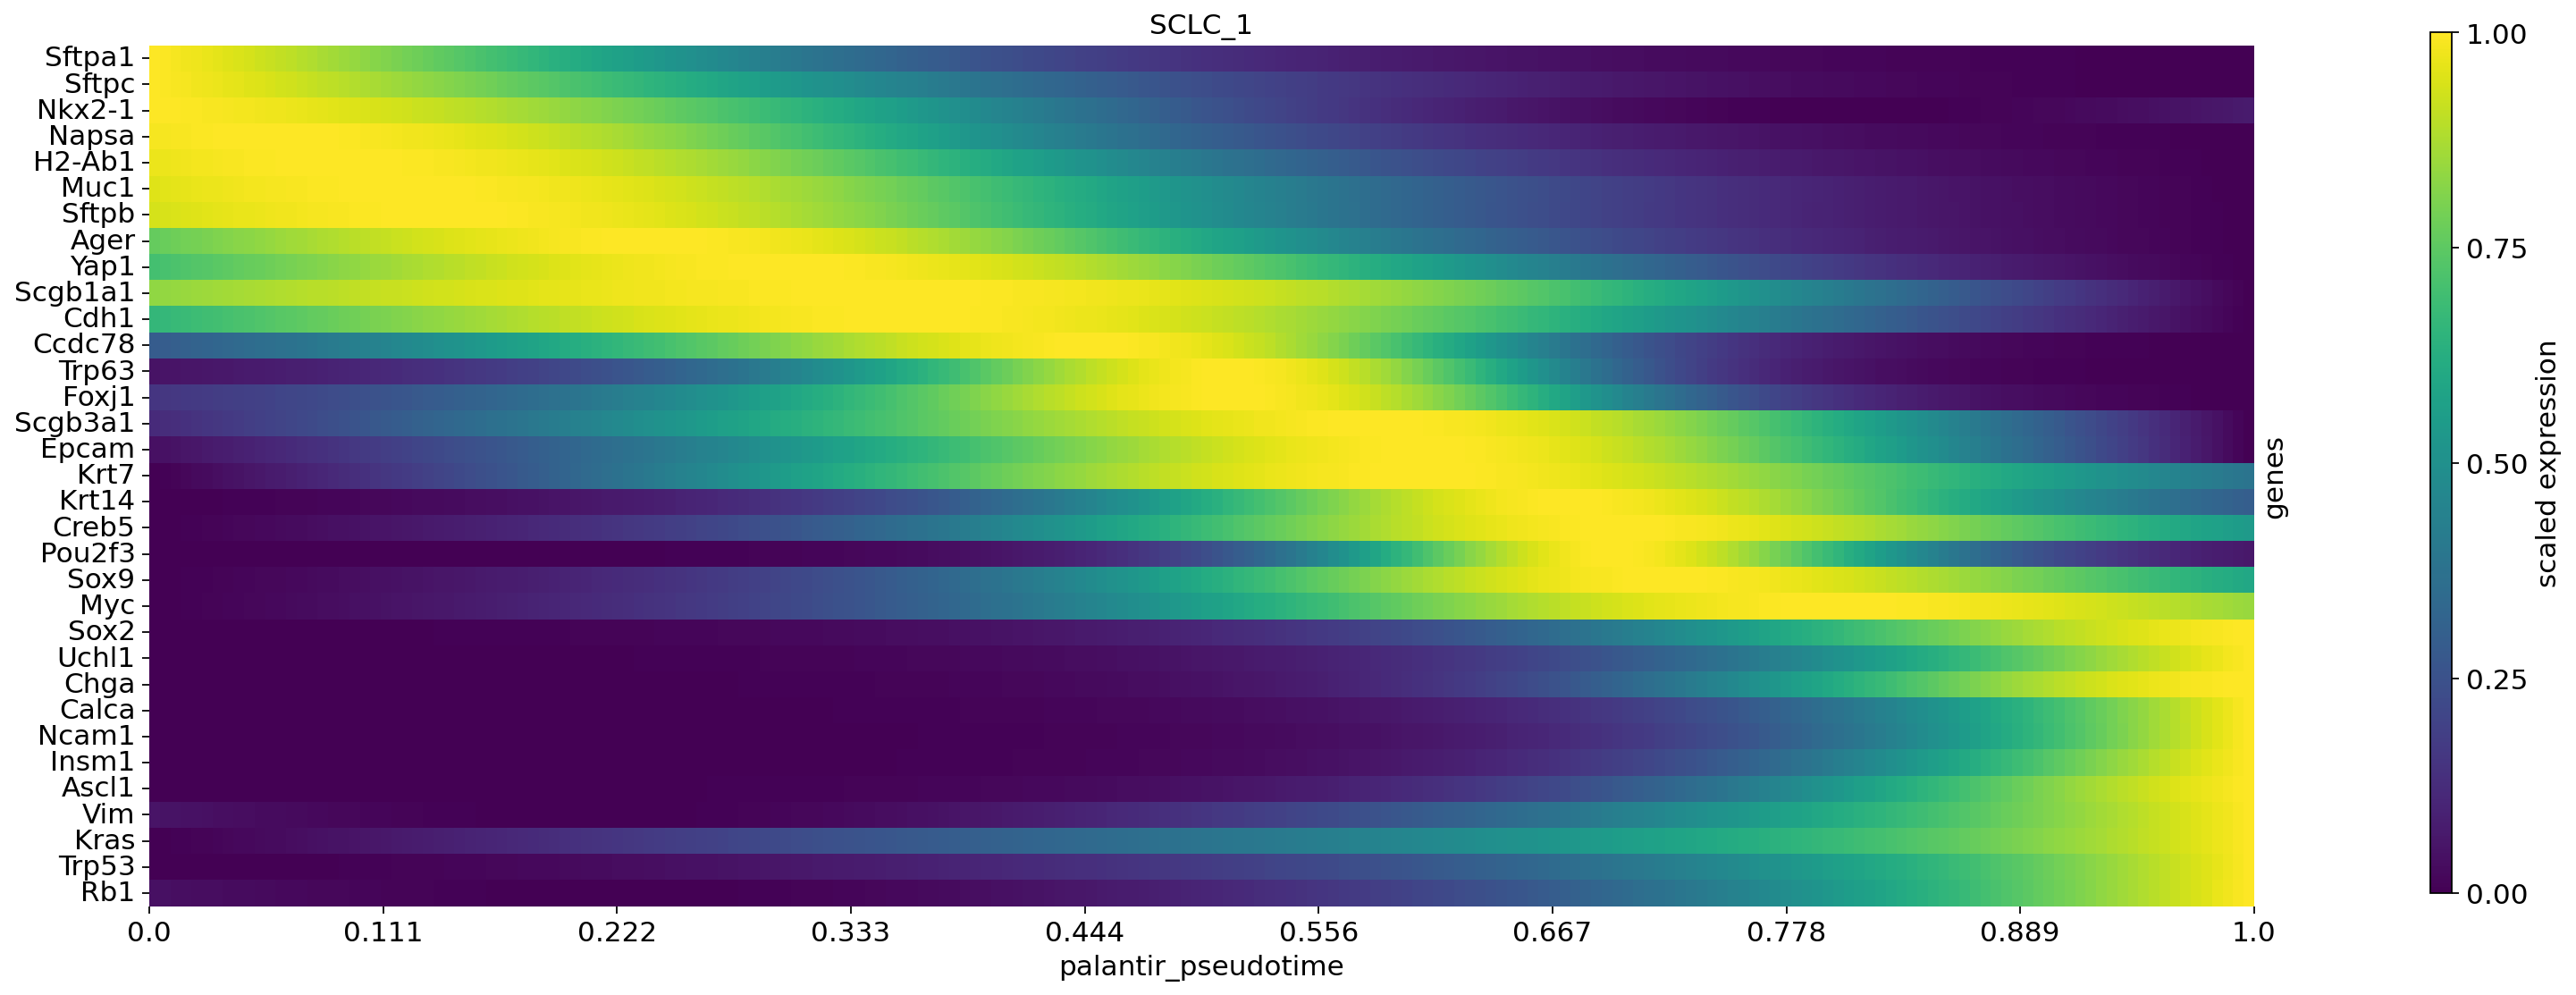

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.


In [52]:
cr.pl.heatmap(
    adata,
    model=model,
    data_key="MAGIC_imputed_data",
    genes=["Foxj1", "Ccdc78", "Scgb1a1", "Scgb3a1", "Krt5", "Trp63", "Krt14", "Creb5", "Sox9", "Sox2", 
"Ager", "Krt7", "Epcam", "Sftpa1", "Sftpb", "Sftpc", "H2-Ab1", "Napsa", "Muc1", "Nkx2-1",
"Uchl1", "Insm1", "Ncam1", "Calca", "Chga", "Ascl1", "Pou2f3", "Yap1", "Cdh1", "Vim", "Myc", "Kras", "Trp53", "Rb1"],
    lineages=["SCLC_1"],
    time_key="palantir_pseudotime",
    cbar=True,
    show_all_genes=True,
    figsize=(20,8),
    save="heatmap2.png"
)

  0%|          | 0/4 [00:00<?, ?gene/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0


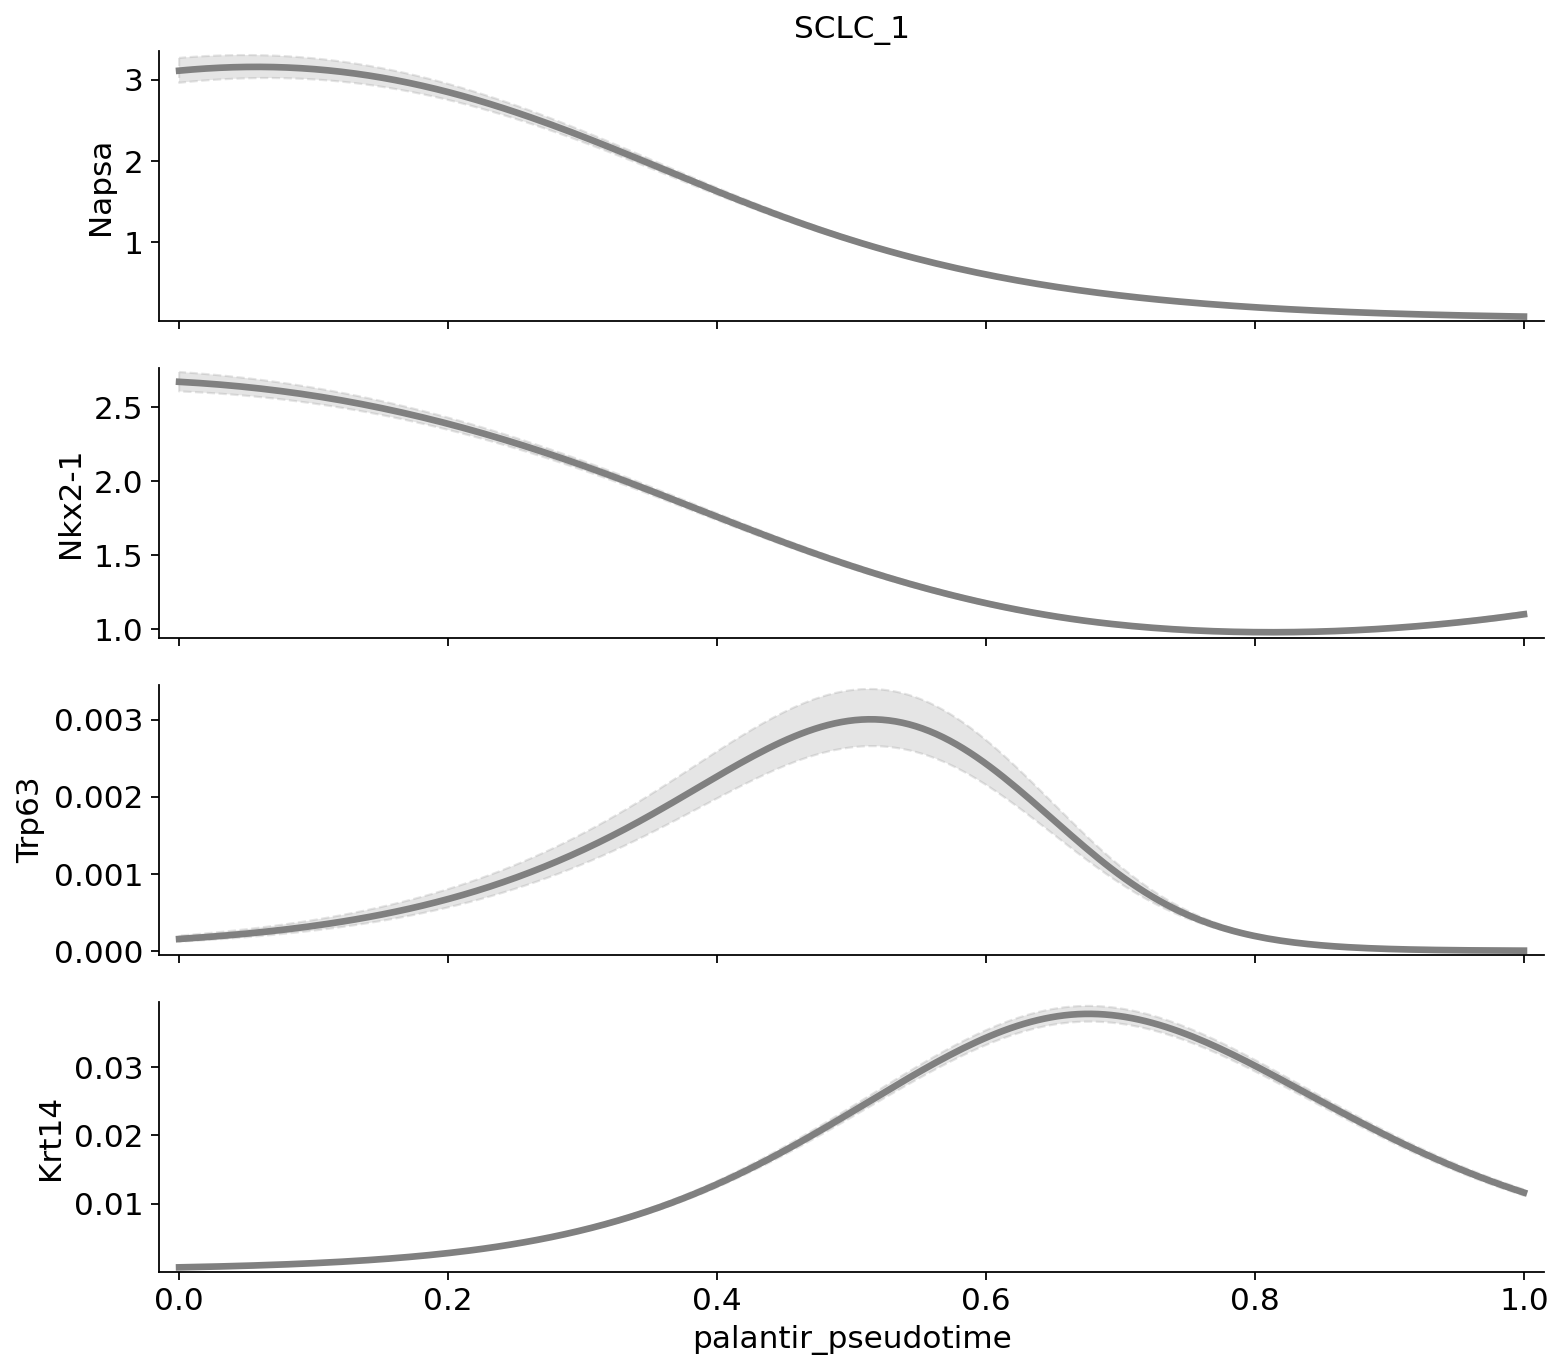

In [53]:
cr.pl.gene_trends(
    adata,
    model=model,
    data_key="MAGIC_imputed_data",
    genes=["Napsa", "Nkx2-1", "Trp63", "Krt14"],
    lineages="SCLC_1",
    lineage_cmap="Grey",
    ncols=2,
    time_key="palantir_pseudotime",
    figsize=(10,9),
    hide_cells=True,
    lw=3,
    save = "trend-8-10-1.pdf"
)

  0%|          | 0/4 [00:00<?, ?gene/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0


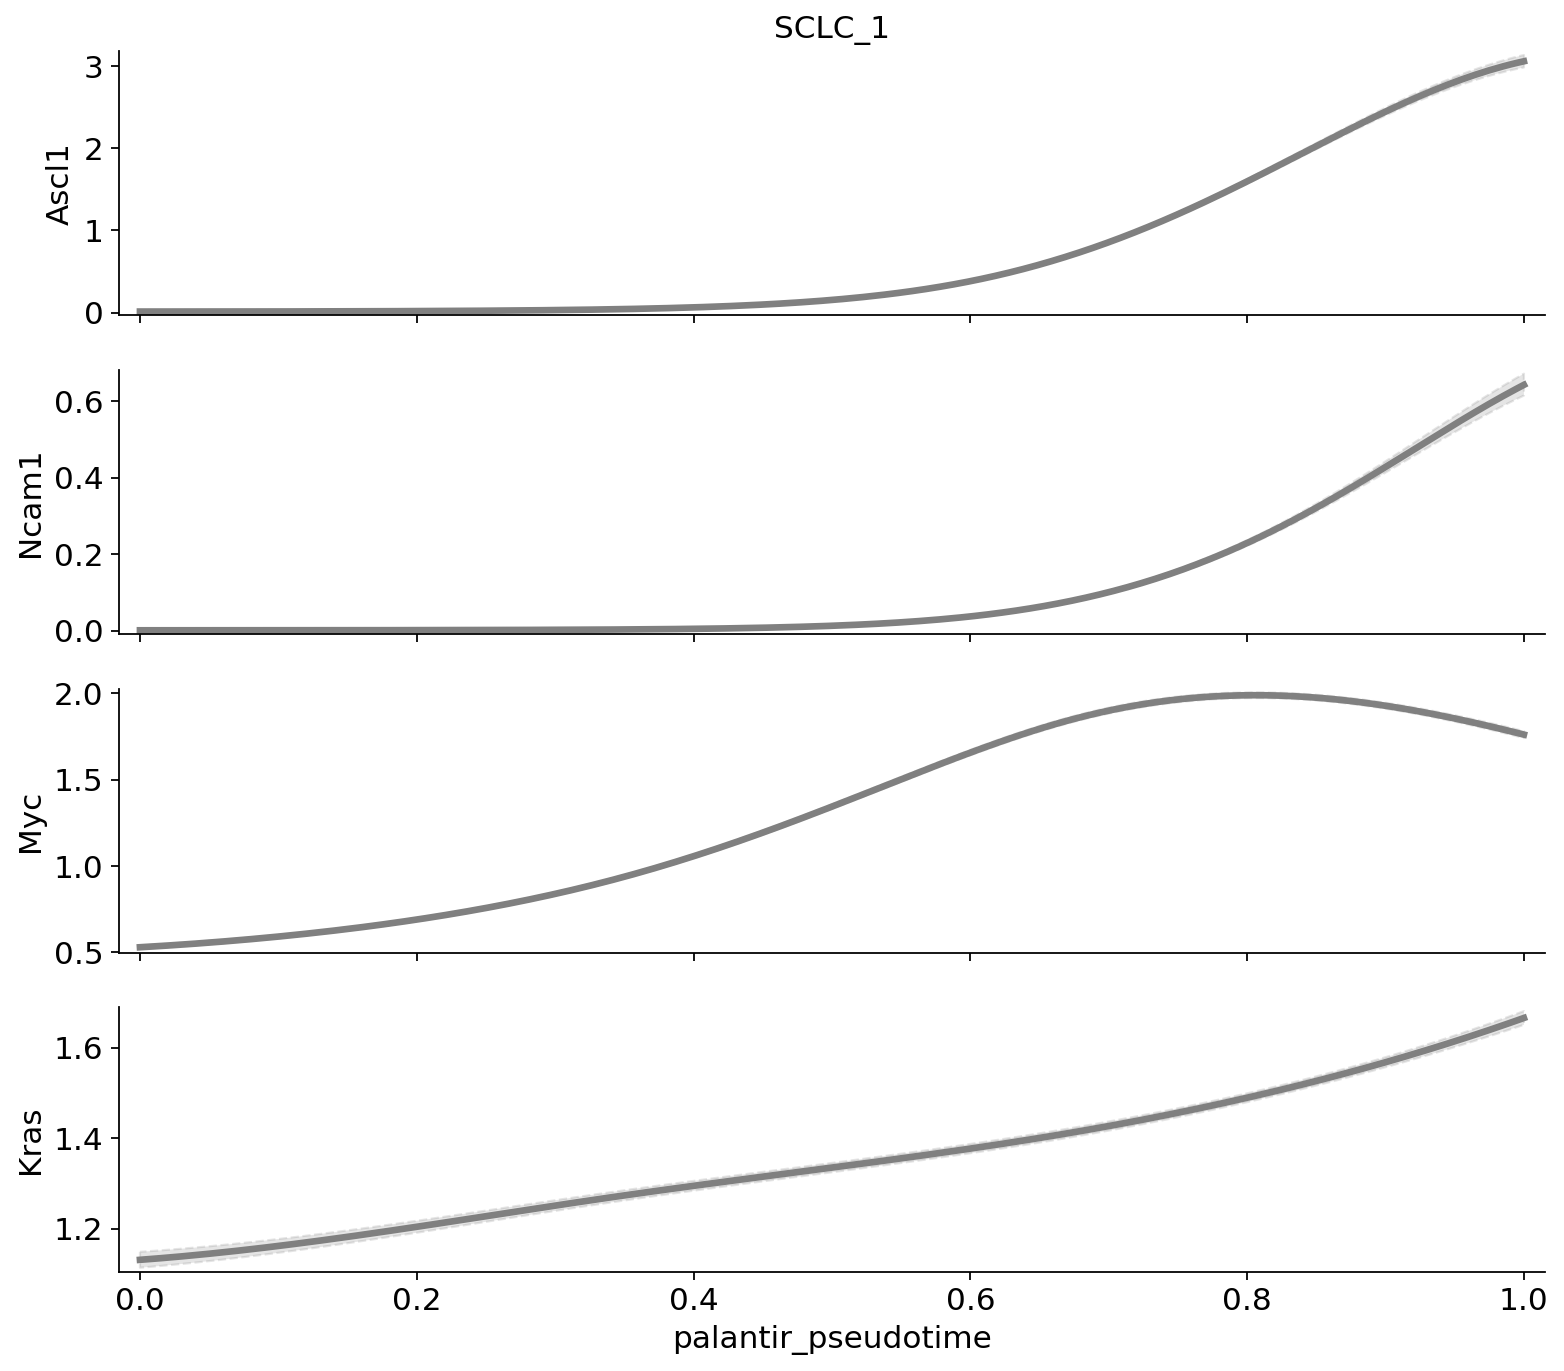

In [54]:
cr.pl.gene_trends(
    adata,
    model=model,
    data_key="MAGIC_imputed_data",
    genes=["Ascl1", "Ncam1", "Myc", "Kras"],
    lineages="SCLC_1",
    lineage_cmap="Grey",
    ncols=2,
    time_key="palantir_pseudotime",
    figsize=(10,9),
    hide_cells=True,
    lw=3,
    save = "trend-8-10-2.pdf"
)

  0%|          | 0/4 [00:00<?, ?gene/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0


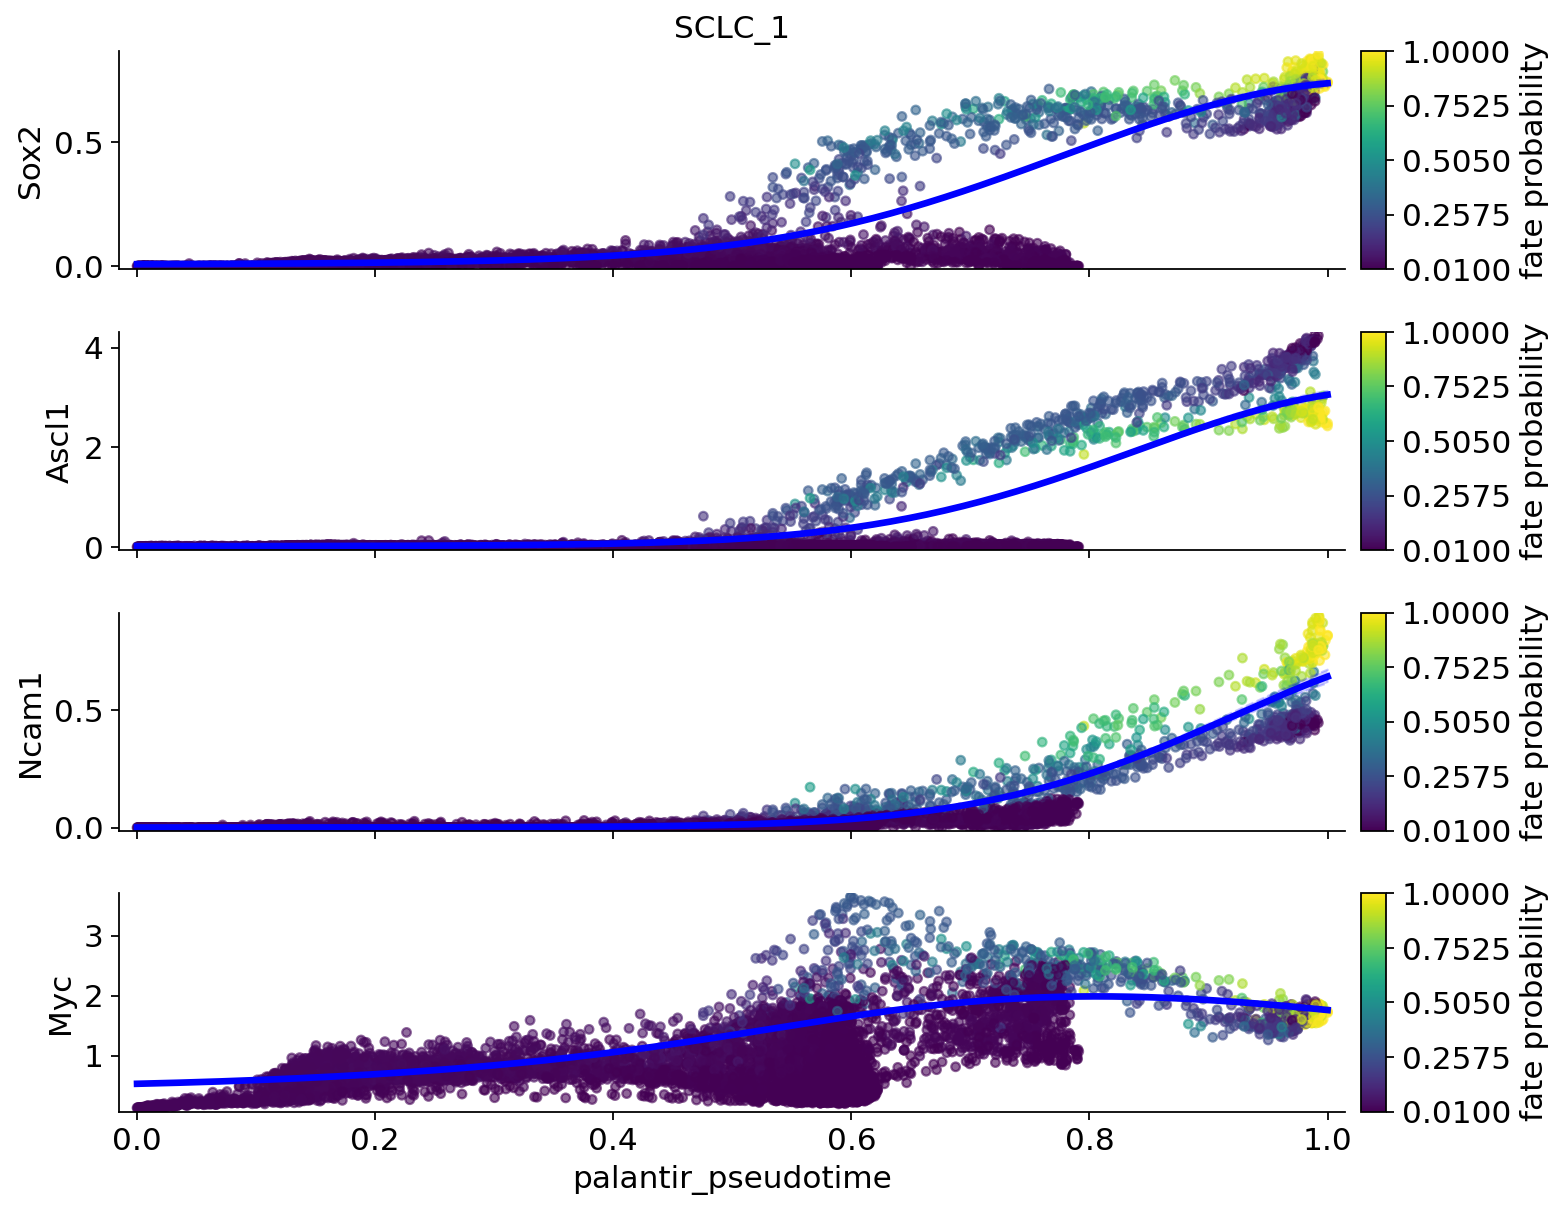

In [57]:
cr.pl.gene_trends(
    adata,
    model=model,
    data_key="MAGIC_imputed_data",
    genes=["Sox2", "Ascl1", "Ncam1", "Myc"],
    lineages="SCLC_1",
    lineage_cmap="blue",
    ncols=2,
    time_key="palantir_pseudotime",
    figsize=(10,8),
    lw=3,
    save = "trend-8-26-red.pdf"
)

In [58]:
pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
adjustText                1.1.1
aiohttp                   3.9.3
aiosignal                 1.3.1
alembic                   1.13.2
anndata                   0.10.5.post1
annotated-types           0.7.0
annoy                     1.17.3
anyio                     4.2.0
arboreto                  0.1.6
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
array_api_compat          1.5
arrow                     1.3.0
asttokens                 2.0.5
async-generator           1.10
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.1.0
Babel                     2.11.0
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    4.1.0
blessed                   1.20.0
blinker                   1.7.0
blis                      0.7.11
bokeh                     3.4.1
boltons                   24.0.0
Brotli         